In [53]:
import numpy as np
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = [10, 5]

## PCA (Principal component analysis)

PCA là một kĩ thuật nhằm nén dữ liệu trong machine learning

Bản chất: thực hiện việc tìm một mặt trong không gian k chiều với các hình chiếu của các điểm dữ liệu ban đầu nằm

trên mặt đó với ràng buộc: khoảng cách từ điểm dữ liệu ban đầu đến mặt trong không gian k chiều là nhỏ nhất

### Thực hiện PCA

#### Khở tạo giá trị

In [73]:
X = np.random.normal(loc=5, scale=1.5, size=(1000, 50))
X.shape

(1000, 50)

#### Tính ma trận hiệp phương sai

In [74]:
X_cov = np.cov(X.T)
X_cov.shape

(50, 50)

#### Tính ma trận Singular Value Decomposite

##### Compute “covariance matrix”
$$\sum := \dfrac{1}{n}\sum_{i=1}^{n}\left(x^{(i)}\right)\left(x^{(i)}\right)^{T}$$ with $x \in \mathbb{R^{n}}$

##### Compute “eigenvectors” of matrix

$$\left[U^{nxn}, S^{nxn}, V\right] := svd\left(\sum\right)$$

In [75]:
u, s, d = np.linalg.svd(X_cov)
u.shape

(50, 50)

#### Chọn subset k trong ma trận SVD

In [91]:
u_reduce = u[:,:2]
u_reduce.shape

(50, 2)

#### Thực hiện giảm số chiều 

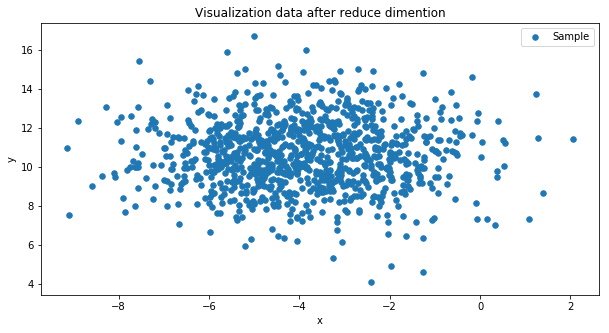

(1000, 2)

In [90]:
X_reduce = X.dot(u_reduce)
plt.title('Visualization data after reduce dimention')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(X_reduce[:,0], X_reduce[:,1], s=30, label='Sample')
plt.legend()
plt.show()
X_reduce.shape

### Chọn giá trị K phù hợp

Việc giảm số chiều làm mất mát thông tin trong dữ liệu gốc

Khi thực hiện PCA, cần xác định 1 ngưỡng giá trị mất mát chấp nhận được

Ta tính 2 thành phần sau:

Average squared project error $$\displaystyle \alpha := \dfrac{1}{m}  \sum_{i=1}^m \Vert x^{(i)}-x^{(i)}_{approx} \Vert^2$$

Total variation in the data $$ \displaystyle \beta := \dfrac{1}{m} \sum_{i=1}^m\Vert x^{i} \Vert^2 $$

Lượng thông tin giữ lại sau khi sử dụng PCA $$ \displaystyle variance := \dfrac{\alpha}{\beta} $$

#### Thực hiện trong Python

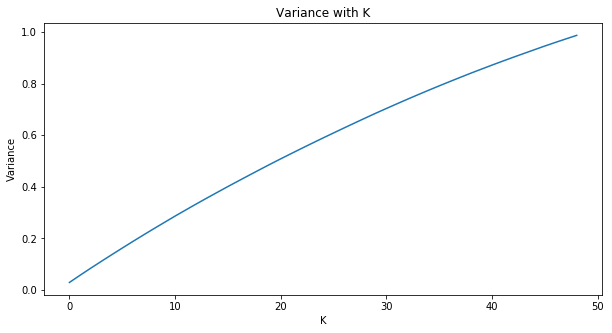

In [87]:
vs = []
plt.title('Variance with K')
plt.xlabel('K')
plt.ylabel('Variance')
for i in range(1, len(s)):
    vs.append(s[:i].sum()/s.sum())
plt.plot(list(range(len(vs))), vs)
plt.show()

### Lưu ý khi sử dụng PCA

* Trước khi thực hiện PCA có thể thực hiện Normalize data hoặc scale


* Không được sử dụng PCA để tránh overfitting, thay vào đó có thể sử dụng regularization


* Nên chạy các thuật toán machine learning trên tập dữ liệu gốc, chỉ khi cần tăng tốc thuật toán hoặc do giới hạn tài nguyên thì nên sử dụng PCA